##**Cancer Cells Prediction**

**Importing Libraries**

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.feature_selection import f_regression
warnings.simplefilter('ignore')

**Data Preprocesing**

In [2]:
df = pd.read_csv('cell_samples.csv')
df.head(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
df.describe().transpose().style.background_gradient(cmap = 'Greens')

,count,mean,std,min,25%,50%,75%,max
ID,699.000000,1071704.098712,617095.729819,61634.000000,870688.500000,1171710.000000,1238298.000000,13454352.000000
Clump,699.000000,4.417740,2.815741,1.000000,2.000000,4.000000,6.000000,10.000000
UnifSize,699.000000,3.134478,3.051459,1.000000,1.000000,1.000000,5.000000,10.000000
UnifShape,699.000000,3.207439,2.971913,1.000000,1.000000,1.000000,5.000000,10.000000
MargAdh,699.000000,2.806867,2.855379,1.000000,1.000000,1.000000,4.000000,10.000000
SingEpiSize,699.000000,3.216023,2.214300,1.000000,2.000000,2.000000,4.000000,10.000000
BlandChrom,699.000000,3.437768,2.438364,1.000000,2.000000,3.000000,5.000000,10.000000
NormNucl,699.000000,2.866953,3.053634,1.000000,1.000000,1.000000,4.000000,10.000000
Mit,699.000000,1.589413,1.715078,1.000000,1.000000,1.000000,1.000000,10.000000
Class,699.000000,2.689557,0.951273,2.000000,2.000000,2.000000,4.000000,4.000000


In [5]:
df.median()

ID             1171710.0
Clump                4.0
UnifSize             1.0
UnifShape            1.0
MargAdh              1.0
SingEpiSize          2.0
BlandChrom           3.0
NormNucl             1.0
Mit                  1.0
Class                2.0
dtype: float64

In [6]:
df.skew()

ID             13.675326
Clump           0.592859
UnifSize        1.233137
UnifShape       1.161859
MargAdh         1.524468
SingEpiSize     1.712172
BlandChrom      1.099969
NormNucl        1.422261
Mit             3.560658
Class           0.654564
dtype: float64

In [7]:
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [8]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [9]:
df.shape

(699, 11)

**Exploratory Data Analysis**

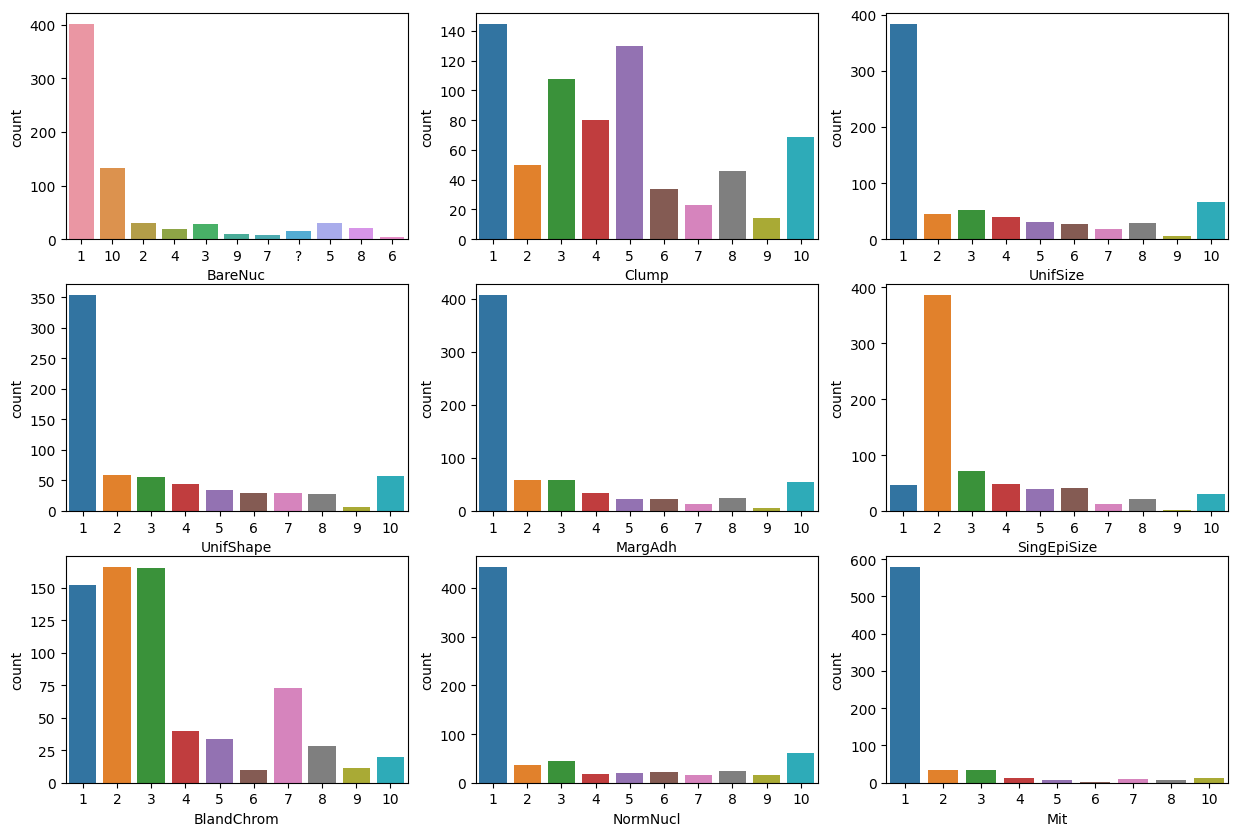

In [14]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

sns.countplot(data = df, x = 'BareNuc',ax =ax[0,0])
sns.countplot(data = df, x = 'Clump', ax =ax[0,1])
sns.countplot(data = df, x = 'UnifSize', ax =ax[0,2])
sns.countplot(data = df, x = 'UnifShape', ax =ax[1,0])
sns.countplot(data = df, x = 'MargAdh', ax =ax[1,1])
sns.countplot(data = df, x = 'SingEpiSize', ax =ax[1,2])
sns.countplot(data = df, x = 'BlandChrom', ax =ax[2,0])
sns.countplot(data = df, x = 'NormNucl', ax =ax[2,1])
sns.countplot(data = df, x = 'Mit', ax =ax[2,2])

plt.show()


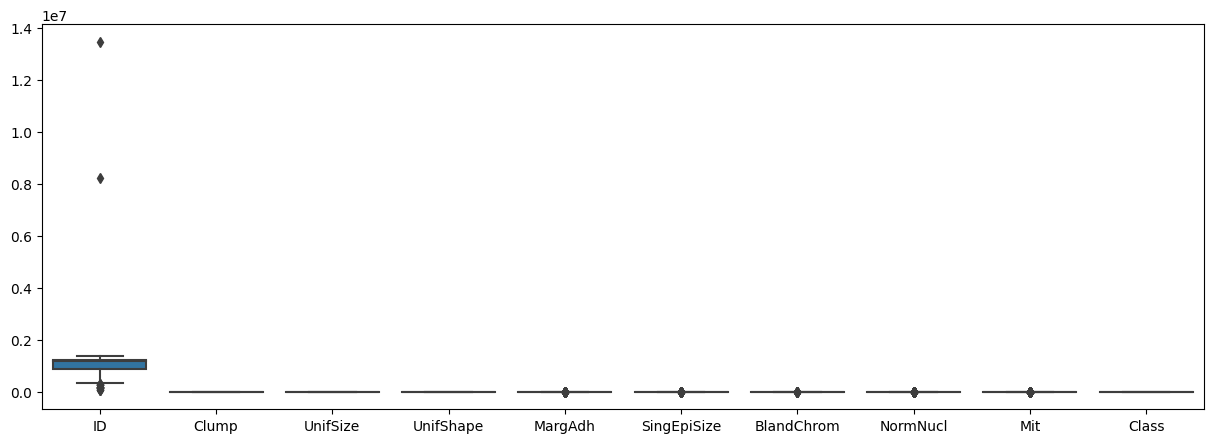

In [15]:
plt.figure(figsize=(15,5))

sns.boxplot(df)

plt.show()

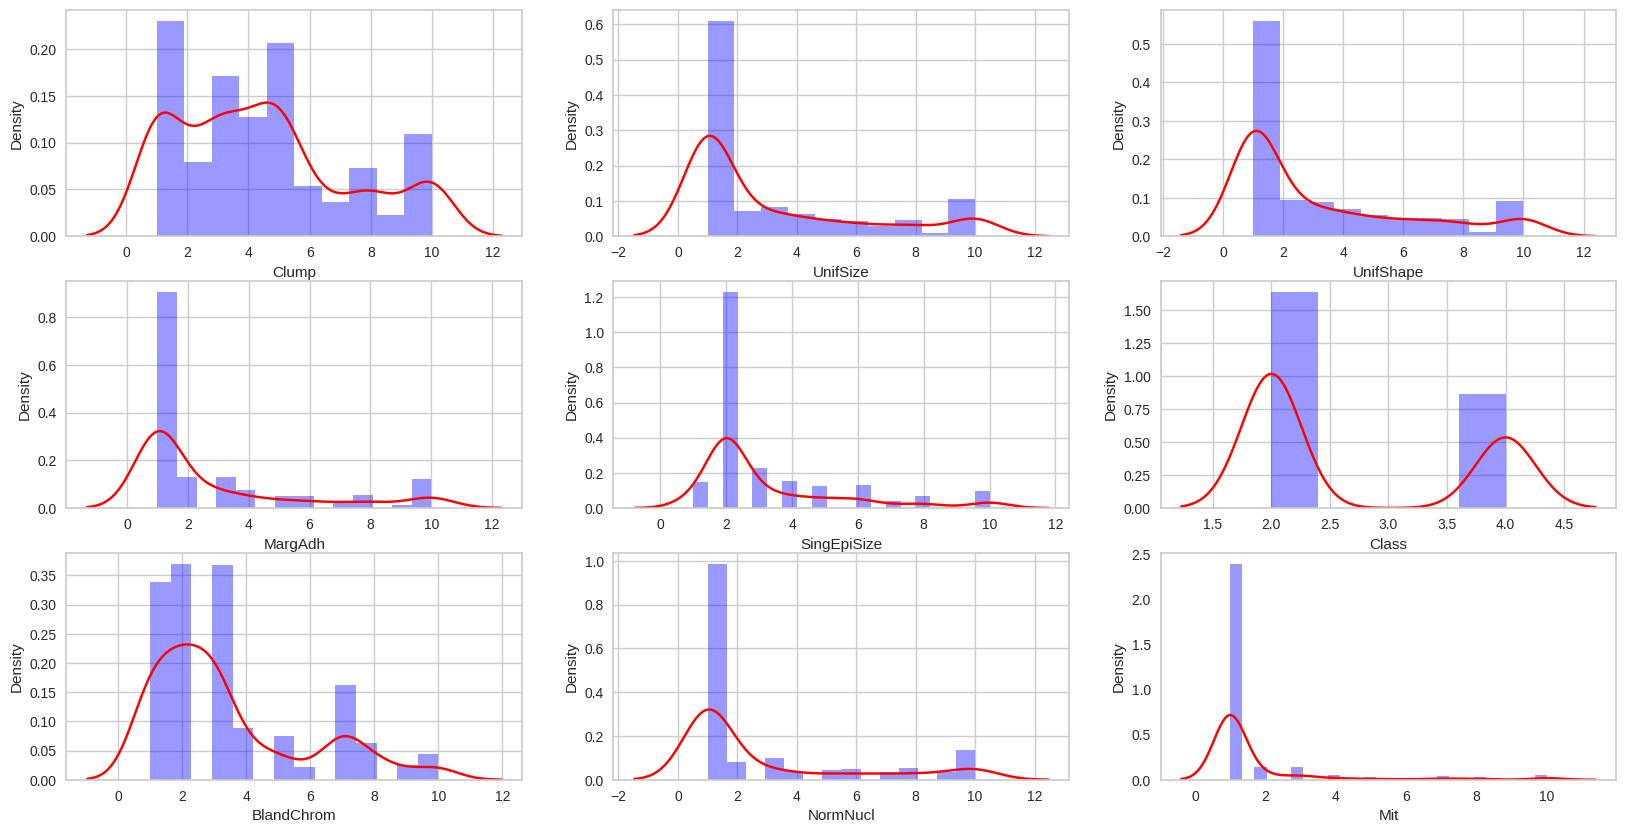

In [74]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))

sns.distplot(df['Clump'],ax=ax[0,0], color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['UnifSize'],ax=ax[0,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['UnifShape'],ax=ax[0,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['MargAdh'],ax=ax[1,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['SingEpiSize'],ax=ax[1,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Class'],ax=ax[1,2],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['BlandChrom'],ax=ax[2,0],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['NormNucl'],ax=ax[2,1],  color = 'red', hist_kws={'color': 'blue'})
sns.distplot(df['Mit'],ax=ax[2,2],  color = 'red', hist_kws={'color': 'blue'})

plt.grid(False)
plt.show()

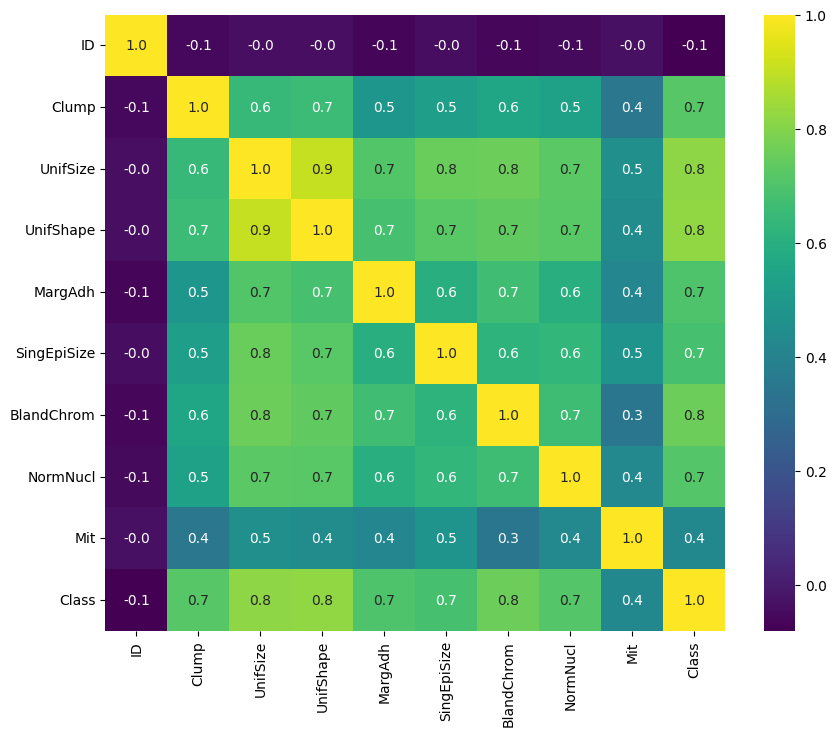

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap='viridis')
plt.show()

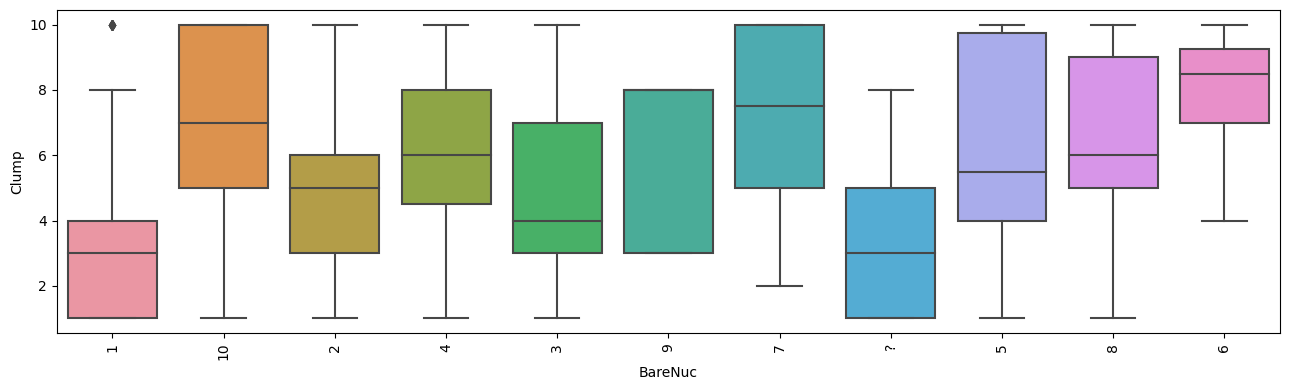

In [32]:
plt.figure(figsize=(13, 4))

sns.boxplot(data=df, x='BareNuc', y='Clump')

plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

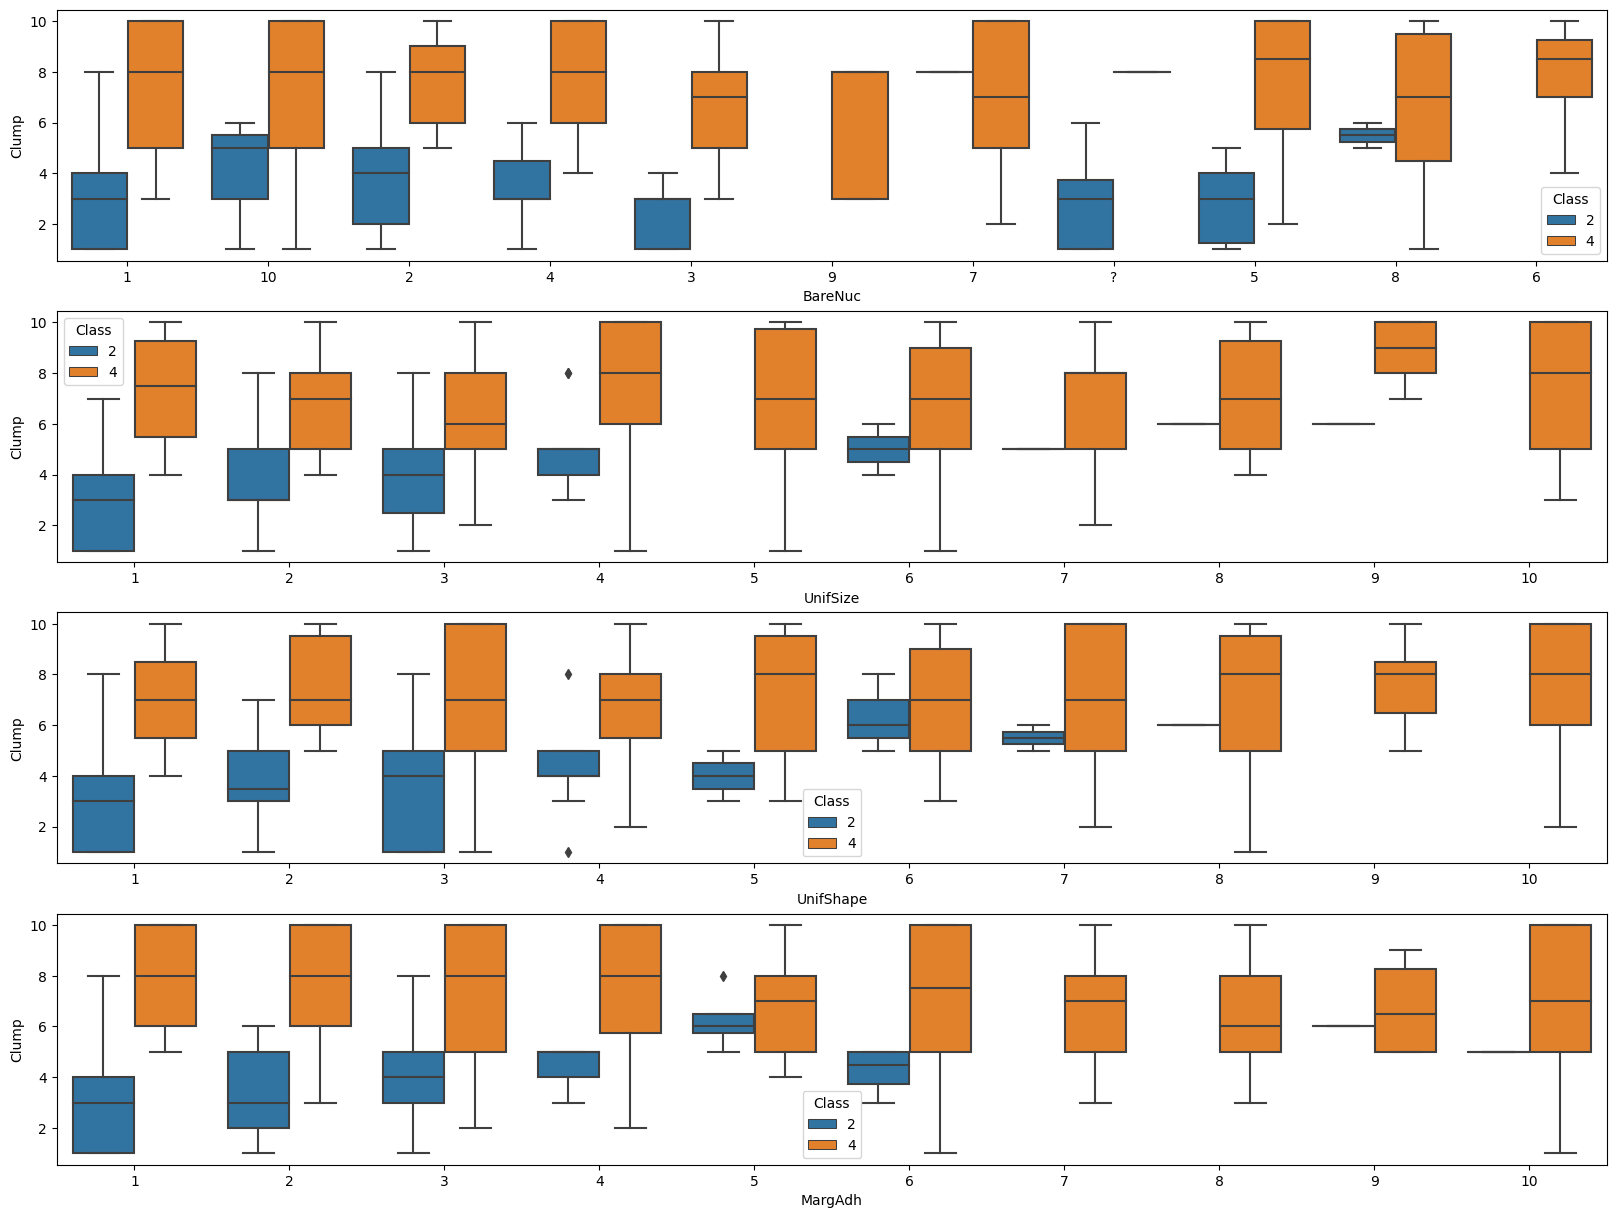

In [39]:
fig, ax = plt.subplots(4, 1, figsize=(20, 15))

sns.boxplot(data=df, x='BareNuc', y='Clump', hue ='Class', ax = ax[0])
sns.boxplot(data=df, x='UnifSize', y='Clump', hue ='Class', ax = ax[1])
sns.boxplot(data=df, x='UnifShape', y='Clump', hue ='Class', ax = ax[2])
sns.boxplot(data=df, x='MargAdh', y='Clump', hue ='Class', ax = ax[3])

plt.show()

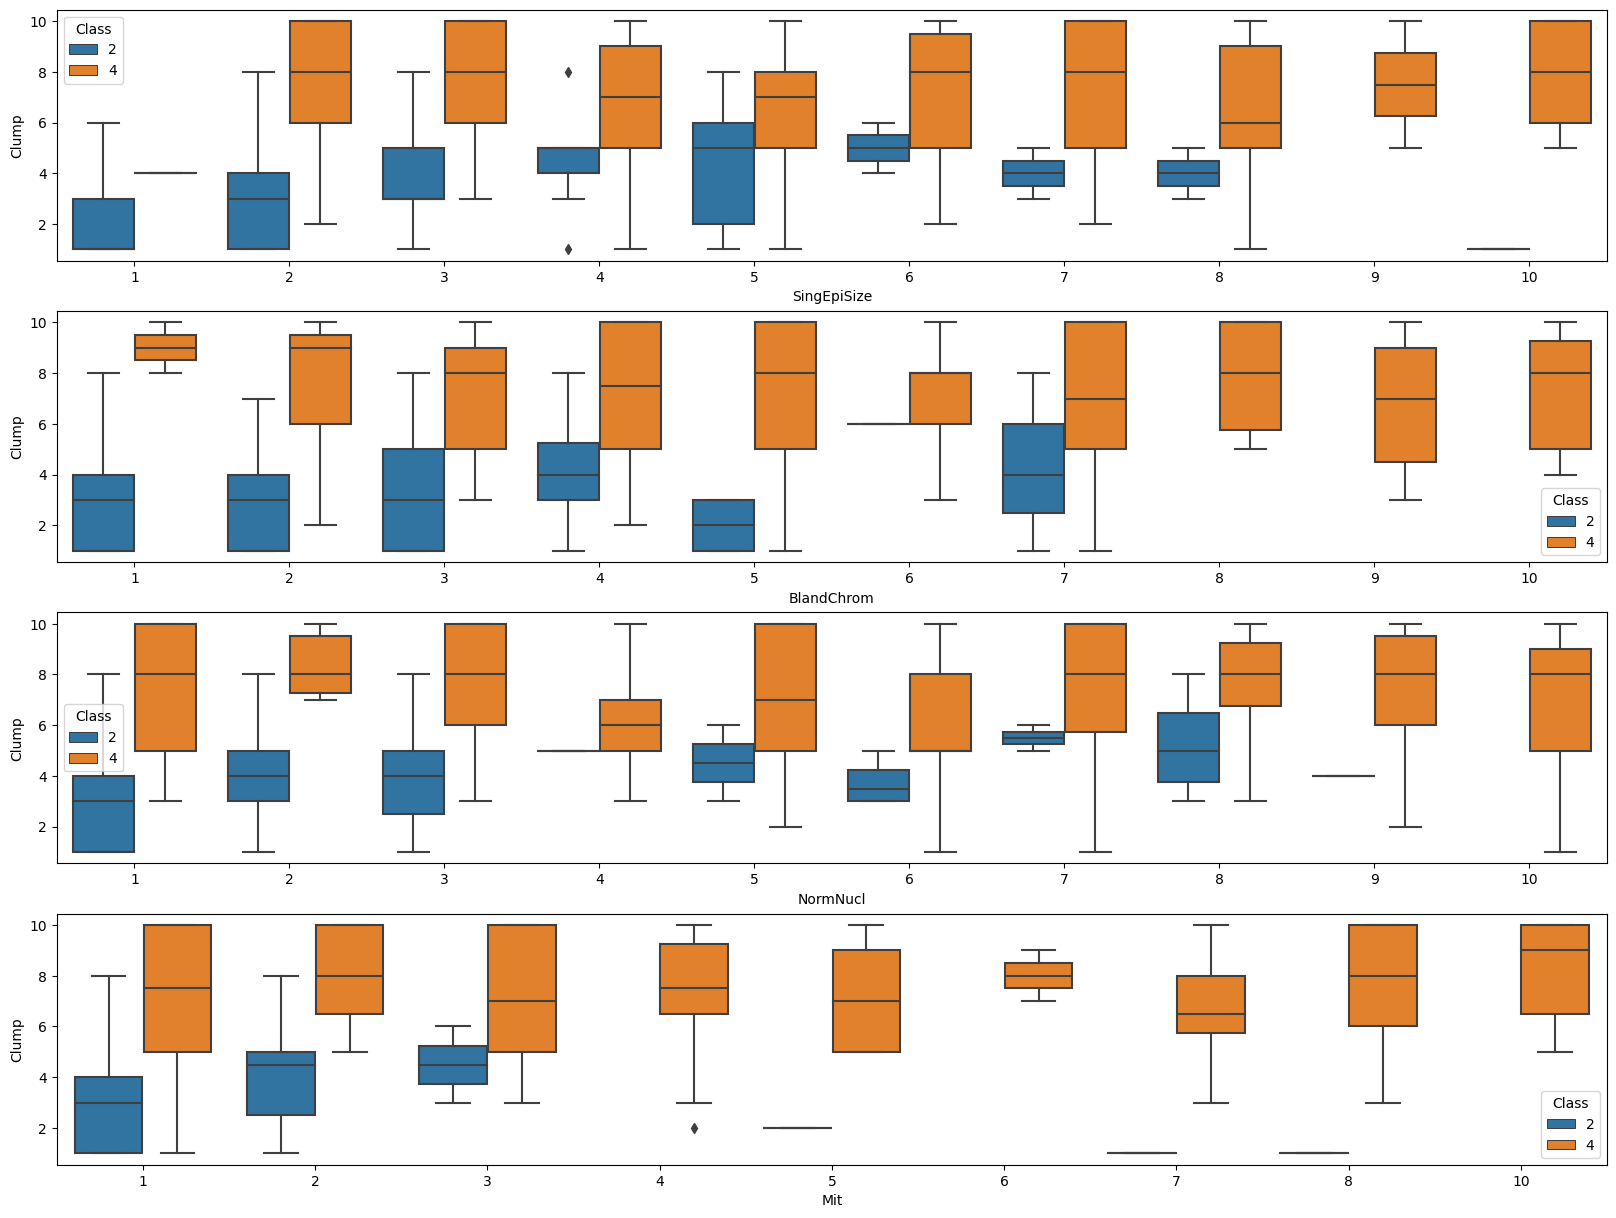

In [41]:
fig, ax = plt.subplots(4, 1, figsize=(20, 15))

sns.boxplot(data=df, x='SingEpiSize', y='Clump', hue ='Class', ax = ax[0])
sns.boxplot(data=df, x='BlandChrom', y='Clump', hue ='Class', ax = ax[1])
sns.boxplot(data=df, x='NormNucl', y='Clump', hue ='Class', ax = ax[2])
sns.boxplot(data=df, x='Mit', y='Clump', hue ='Class', ax = ax[3])

plt.show()

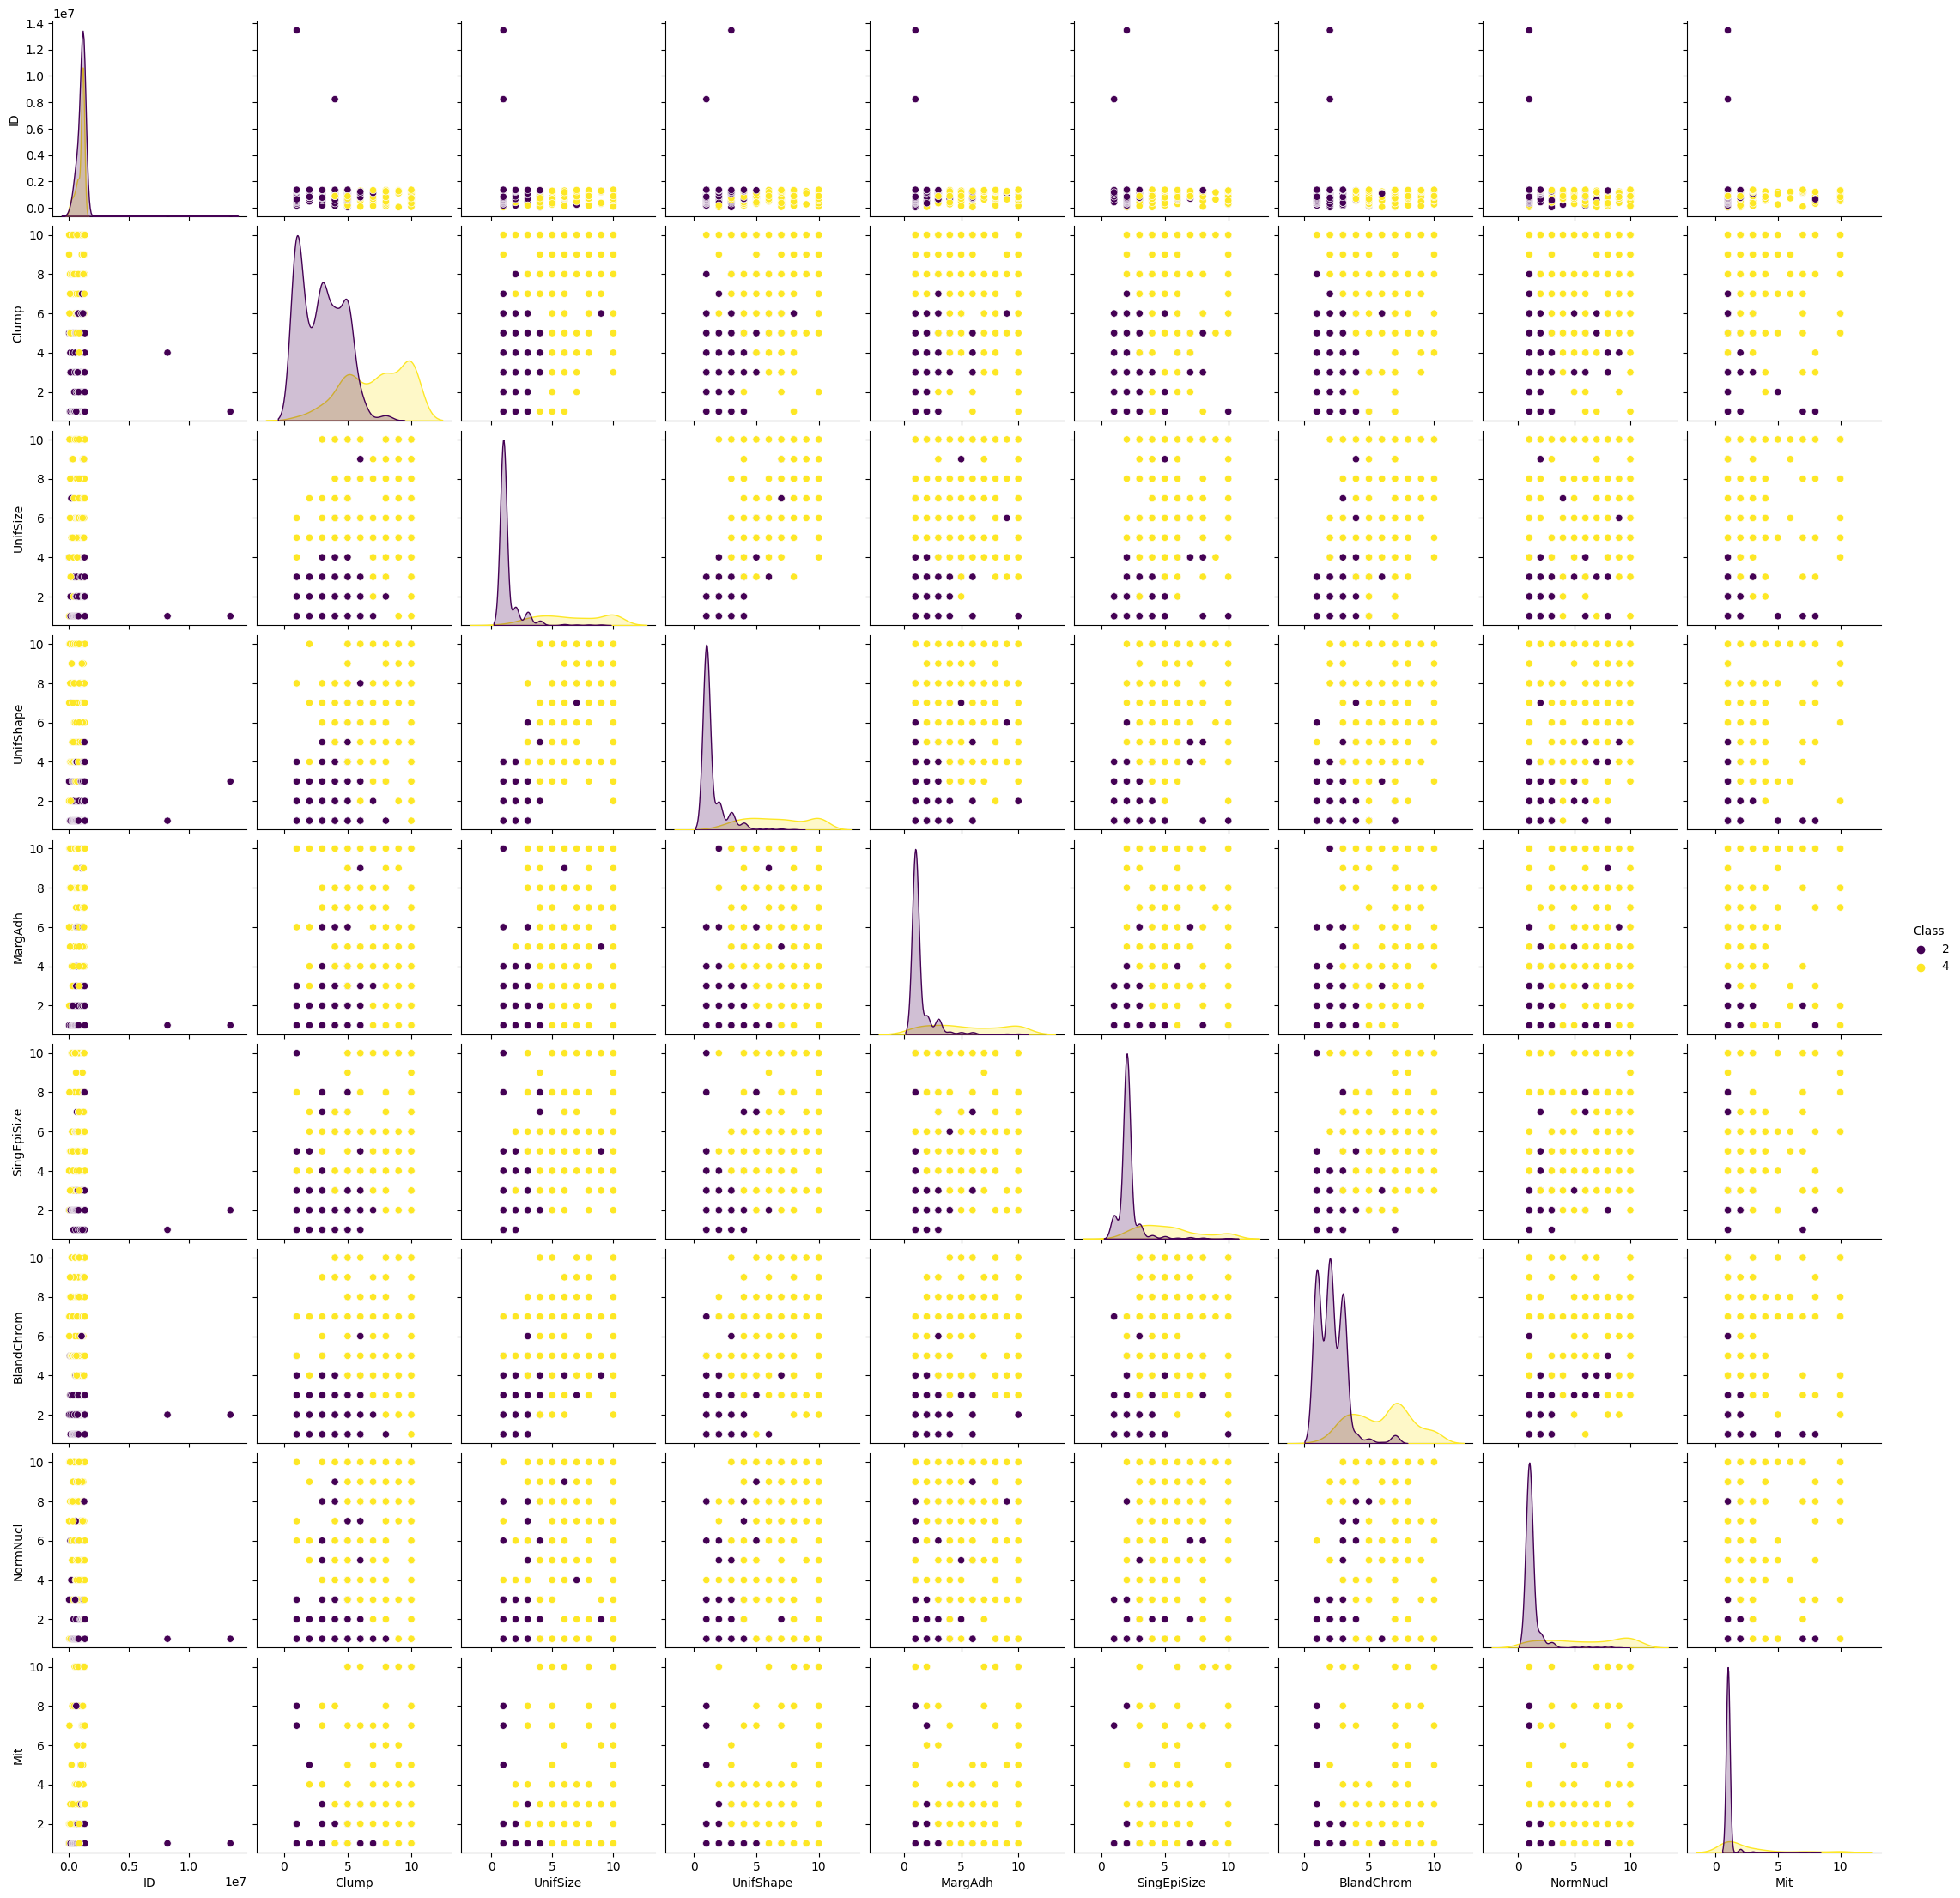

In [44]:
sns.pairplot(df, hue = 'Class', palette = 'viridis')
plt.show()

**Encoder**

In [46]:
lb = LabelEncoder()
df['BareNuc'] = lb.fit_transform(df['BareNuc'])
df.head(1)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,0,3,1,1,2


**Modeling and Evaluation**

In [61]:
X_M = df.drop('Class', axis = 1)
Y_M = df['Class']
scaler = MinMaxScaler()
x = scaler.fit_transform(X_M)

**Train Test Split**

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, Y_M, test_size=0.30, random_state=42)

**Logistic Regression**

In [63]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           2       0.97      0.98      0.98       143
           4       0.95      0.94      0.95        67

    accuracy                           0.97       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210

accuracy:  0.9666666666666667
mean_absolute_error:  0.06666666666666667
mean_squared_error:  0.13333333333333333


**Random Forest Classifier**

In [64]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98       143
           4       0.96      0.97      0.96        67

    accuracy                           0.98       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.98      0.98      0.98       210

accuracy:  0.9761904761904762
mean_absolute_error:  0.047619047619047616
mean_squared_error:  0.09523809523809523


**Decision Tree**

In [65]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           2       0.94      0.95      0.95       143
           4       0.89      0.88      0.89        67

    accuracy                           0.93       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.93      0.93      0.93       210

accuracy:  0.9285714285714286
mean_absolute_error:  0.14285714285714285
mean_squared_error:  0.2857142857142857


**SVC**

In [66]:
model_SVC = SVC(kernel = 'linear' ,random_state = 42)
model_SVC.fit(X_train, y_train)
model_SVC.score(X_train, y_train)
model_SVC_Pred = model_SVC.predict(X_test)

print(classification_report(y_test, model_SVC_Pred))
print("accuracy: ",accuracy_score(y_test, model_SVC_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_SVC_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_SVC_Pred))

              precision    recall  f1-score   support

           2       0.98      0.97      0.98       143
           4       0.94      0.96      0.95        67

    accuracy                           0.97       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210

accuracy:  0.9666666666666667
mean_absolute_error:  0.06666666666666667
mean_squared_error:  0.13333333333333333


**KNeighborsClassifier**

In [67]:
model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           2       0.98      0.97      0.98       143
           4       0.94      0.96      0.95        67

    accuracy                           0.97       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210

accuracy:  0.9666666666666667
mean_absolute_error:  0.06666666666666667
mean_squared_error:  0.13333333333333333


2    143
4     67
Name: Class, dtype: int64


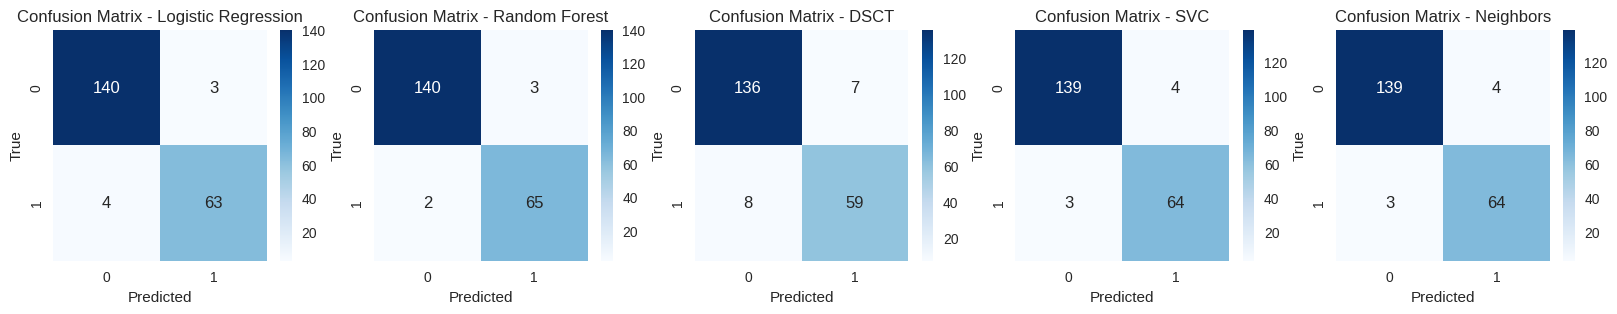

In [70]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
SVC_ = confusion_matrix(y_test, model_SVC_Pred)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Blues', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

sns.heatmap(SVC_, annot=True, cmap='Blues', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - SVC')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

sns.heatmap(NEG, annot=True, cmap='Blues', fmt='g', ax=axes[4])
axes[4].set_title('Confusion Matrix - Neighbors')
axes[4].set_xlabel('Predicted')
axes[4].set_ylabel('True')

print(y_test.value_counts())
plt.show()

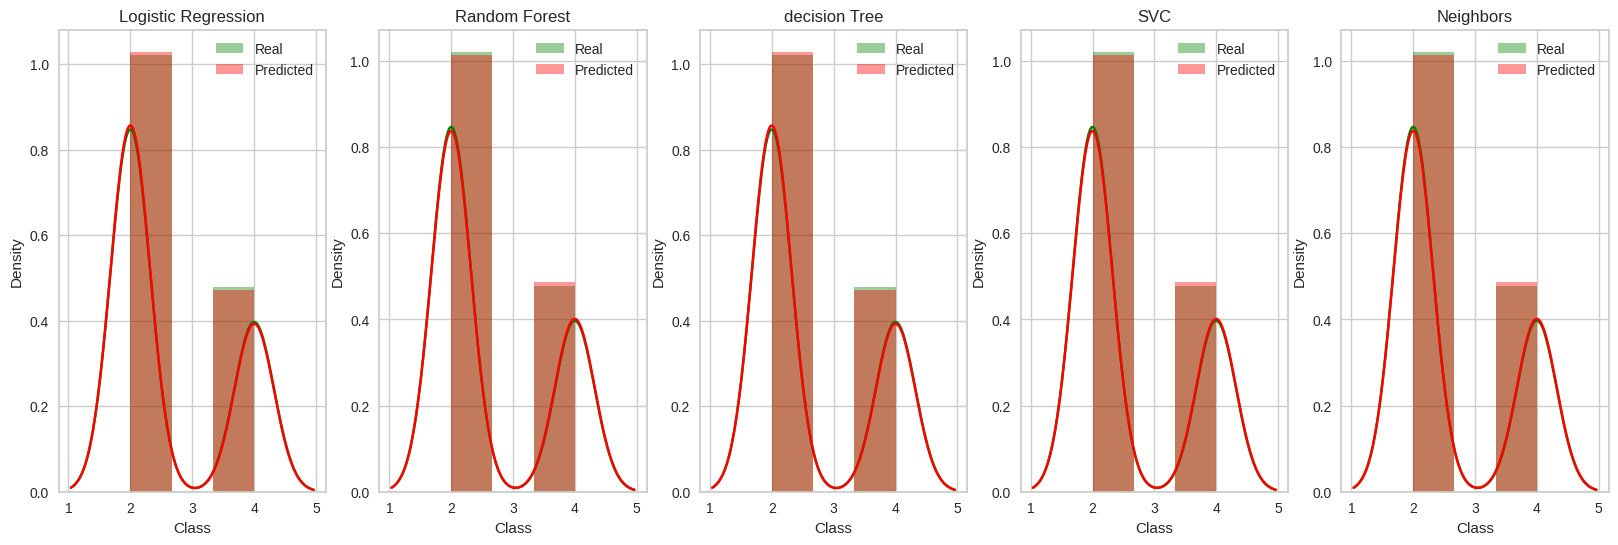

In [72]:
fig, ax = plt.subplots(1, 5, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(model_SVC_Pred, label='Predicted', ax=ax[3], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[4], color = 'Green')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[4], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('SVC')
ax[4].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
plt.show()